Saving employee.csv (1).xlsx to employee.csv (1) (13).xlsx
   EmpID    Age  AgeGroup Attrition  BusinessTravel          DailyRate  \
0      0  RM297        18     18-25               1      Travel_Rarely   
1      1  RM302        18     18-25               0      Travel_Rarely   
2      2  RM458        18     18-25               1  Travel_Frequently   
3      3  RM728        18     18-25               0         Non-Travel   
4      4  RM829        18     18-25               1         Non-Travel   

   Department        DistanceFromHome  Education  EducationField  ...  \
0         230  Research & Development          3               3  ...   
1         812                   Sales         10               3  ...   
2        1306                   Sales          5               3  ...   
3         287  Research & Development          5               2  ...   
4         247  Research & Development          8               1  ...   

  StandardHours StockOptionLevel  TotalWorkingYears  Trai

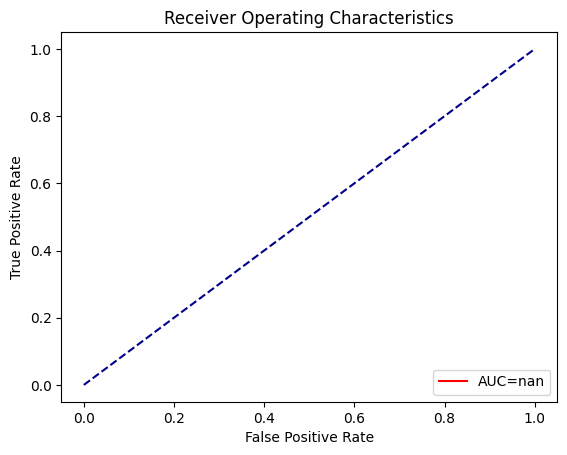

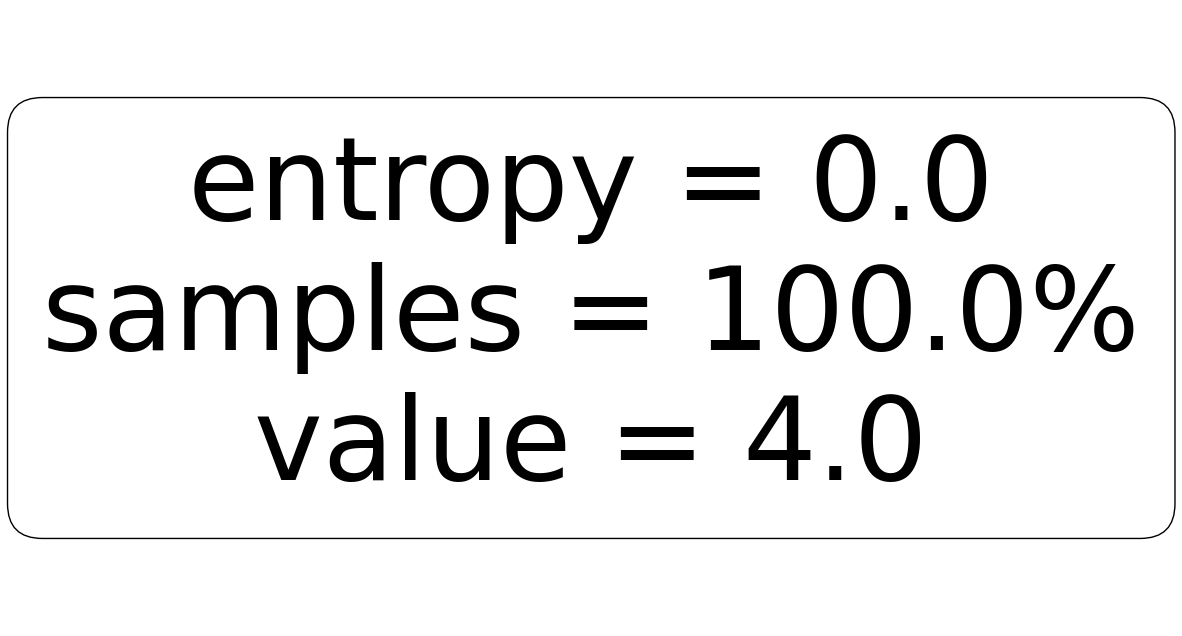

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from google.colab import files
import warnings
import numpy as np
from sklearn import metrics
from sklearn import tree

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Upload the file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Read the Excel file
df = pd.read_excel(filename)
print(df.head())

# Step 3: Basic data inspection
print(df.shape)
print(df.EducationField.value_counts())
print(df.BusinessTravel.value_counts())
print(df.Department.value_counts())
print(df.Attrition.value_counts(normalize=True))

# Define feature and target variables
x = df.drop('Attrition', axis=1)  # Assuming 'Attrition' is the target variable
y = df['Attrition']

# Convert categorical variables to dummy variables
x_dummies = pd.get_dummies(x)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, test_size=0.2, random_state=42)

# Instantiate and train the Decision Tree model with entropy criterion
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

def compute_auc(test, train_instance, pos_label='18-25'):
    probs = train_instance.predict_proba(test)
    if probs.shape[1] > 1:
        prob_positive = probs[:, 1]
    else:
        prob_positive = probs[:, 0]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive, pos_label=pos_label)
    roc_auc = auc(fpr, tpr)
    return roc_auc, fpr, tpr

def plot_ROC(roc, fpr, tpr):
    plt.title("Receiver Operating Characteristics")
    plt.plot(fpr, tpr, 'red', label='AUC=%0.2f' % roc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

roc_auc, fpr, tpr = compute_auc(x_test, clf, pos_label='18-25')
plot_ROC(roc_auc, fpr, tpr)

# Plot the decision tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf, feature_names=x_dummies.columns, filled=True, precision=2, proportion=True, rounded=True)
plt.show()
